In [1]:
import os;import sys; sys.path.append('../../DataPreparation')
from cleaner import read_data
from helpers import convey_insights,display_with_scroll
sys.path.append("../../")
from utils import save_model,save_hyperparameters,load_hyperparameters,nice_table
from ModelPipelines.ModelAnalysis import evaluate, learning_curves,cross_validation,log_weights_analysis
from mlpath import mlquest as mlq
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.feature_selection import RFE

In [2]:
model_name= 'LogisticRegression'
model_adjusted_name= model_name
mlq.start_quest(model_name, table_dest="../../", log_defs=True)

# <font color="aqua">Logistic Regression </font> Model

###  Read the Data

In [3]:
x_data, y_data,_,_ = mlq.l(read_data)(split="train", nulls="mix",outliers="cap", standardize="standardize",encode='Binary',pca=0.9,skip=['RetentionCalls','RetentionOffersAccepted'], oversample='None')

### Default values of HyperParameters

In [4]:
nice_table(LogisticRegression().get_params())

C,class_weight,dual,fit_intercept,intercept_scaling,l1_ratio,max_iter,multi_class,n_jobs,penalty,random_state,solver,tol,verbose,warm_start
1.0,None,False,True,1,None,100,auto,None,l2,None,lbfgs,0.0001,0,False


### Search Best Hyper Parameters

In [5]:
if os.path.exists(f"../../Saved/{model_adjusted_name}_opt_params.pkl") :
    opt_params=load_hyperparameters(model_adjusted_name)
    
else:
    model=mlq.l(LogisticRegression)()
    params = {
       "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
       "penalty": ['none', "l2"],  # Regularization type
       "max_iter": [100, 200, 300]  # Maximum number of iterations
    }

    model = RandomizedSearchCV(model, params, n_iter=10, cv=5, verbose=3, n_jobs=-1,scoring="f1")
    model.fit(x_data, y_data)

    opt_params = model.best_params_
    save_hyperparameters(model_adjusted_name, opt_params)

In [6]:
nice_table(opt_params)

penalty,max_iter,C
l2,100,1


### Train Model

In [7]:
model = mlq.l(LogisticRegression)(**opt_params)
model.fit(x_data,y_data)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

### Evaluate Model

In [8]:
y_pred=model.predict(x_data)
metrics=evaluate(y_pred=y_pred, y_true=y_data,title="Train Evaluation Metrics", table=True)
convey_insights([
    "We can see that the recall is extremely bad (not able to detect all poitive class which is those who churned)",
    "The accuracy is better because it is biased towards the majority class which is the non churned customers",
])

Accuracy,Precision,Recall,F1 Score,ROC AUC
0.7122,0.48434,0.03693,0.06863,0.51055


<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> We can see that the recall is extremely bad (not able to detect all poitive class which is those who churned)<br><br><font color="pink">✦</font> The accuracy is better because it is biased towards the majority class which is the non churned customers<br><br></font>

### Model Generalization

In [9]:
scores=cross_validation(model,x_data,y_data)

Accuracy_train,Precision_train,Recall_train,F1 Score_train,ROC AUC_train
0.71274,0.49681,0.03851,0.07147,0.62922


Accuracy_test,Precision_test,Recall_test,F1 Score_test,ROC AUC_test
0.71173,0.47366,0.03667,0.06807,0.62213


### Model Learning Curve

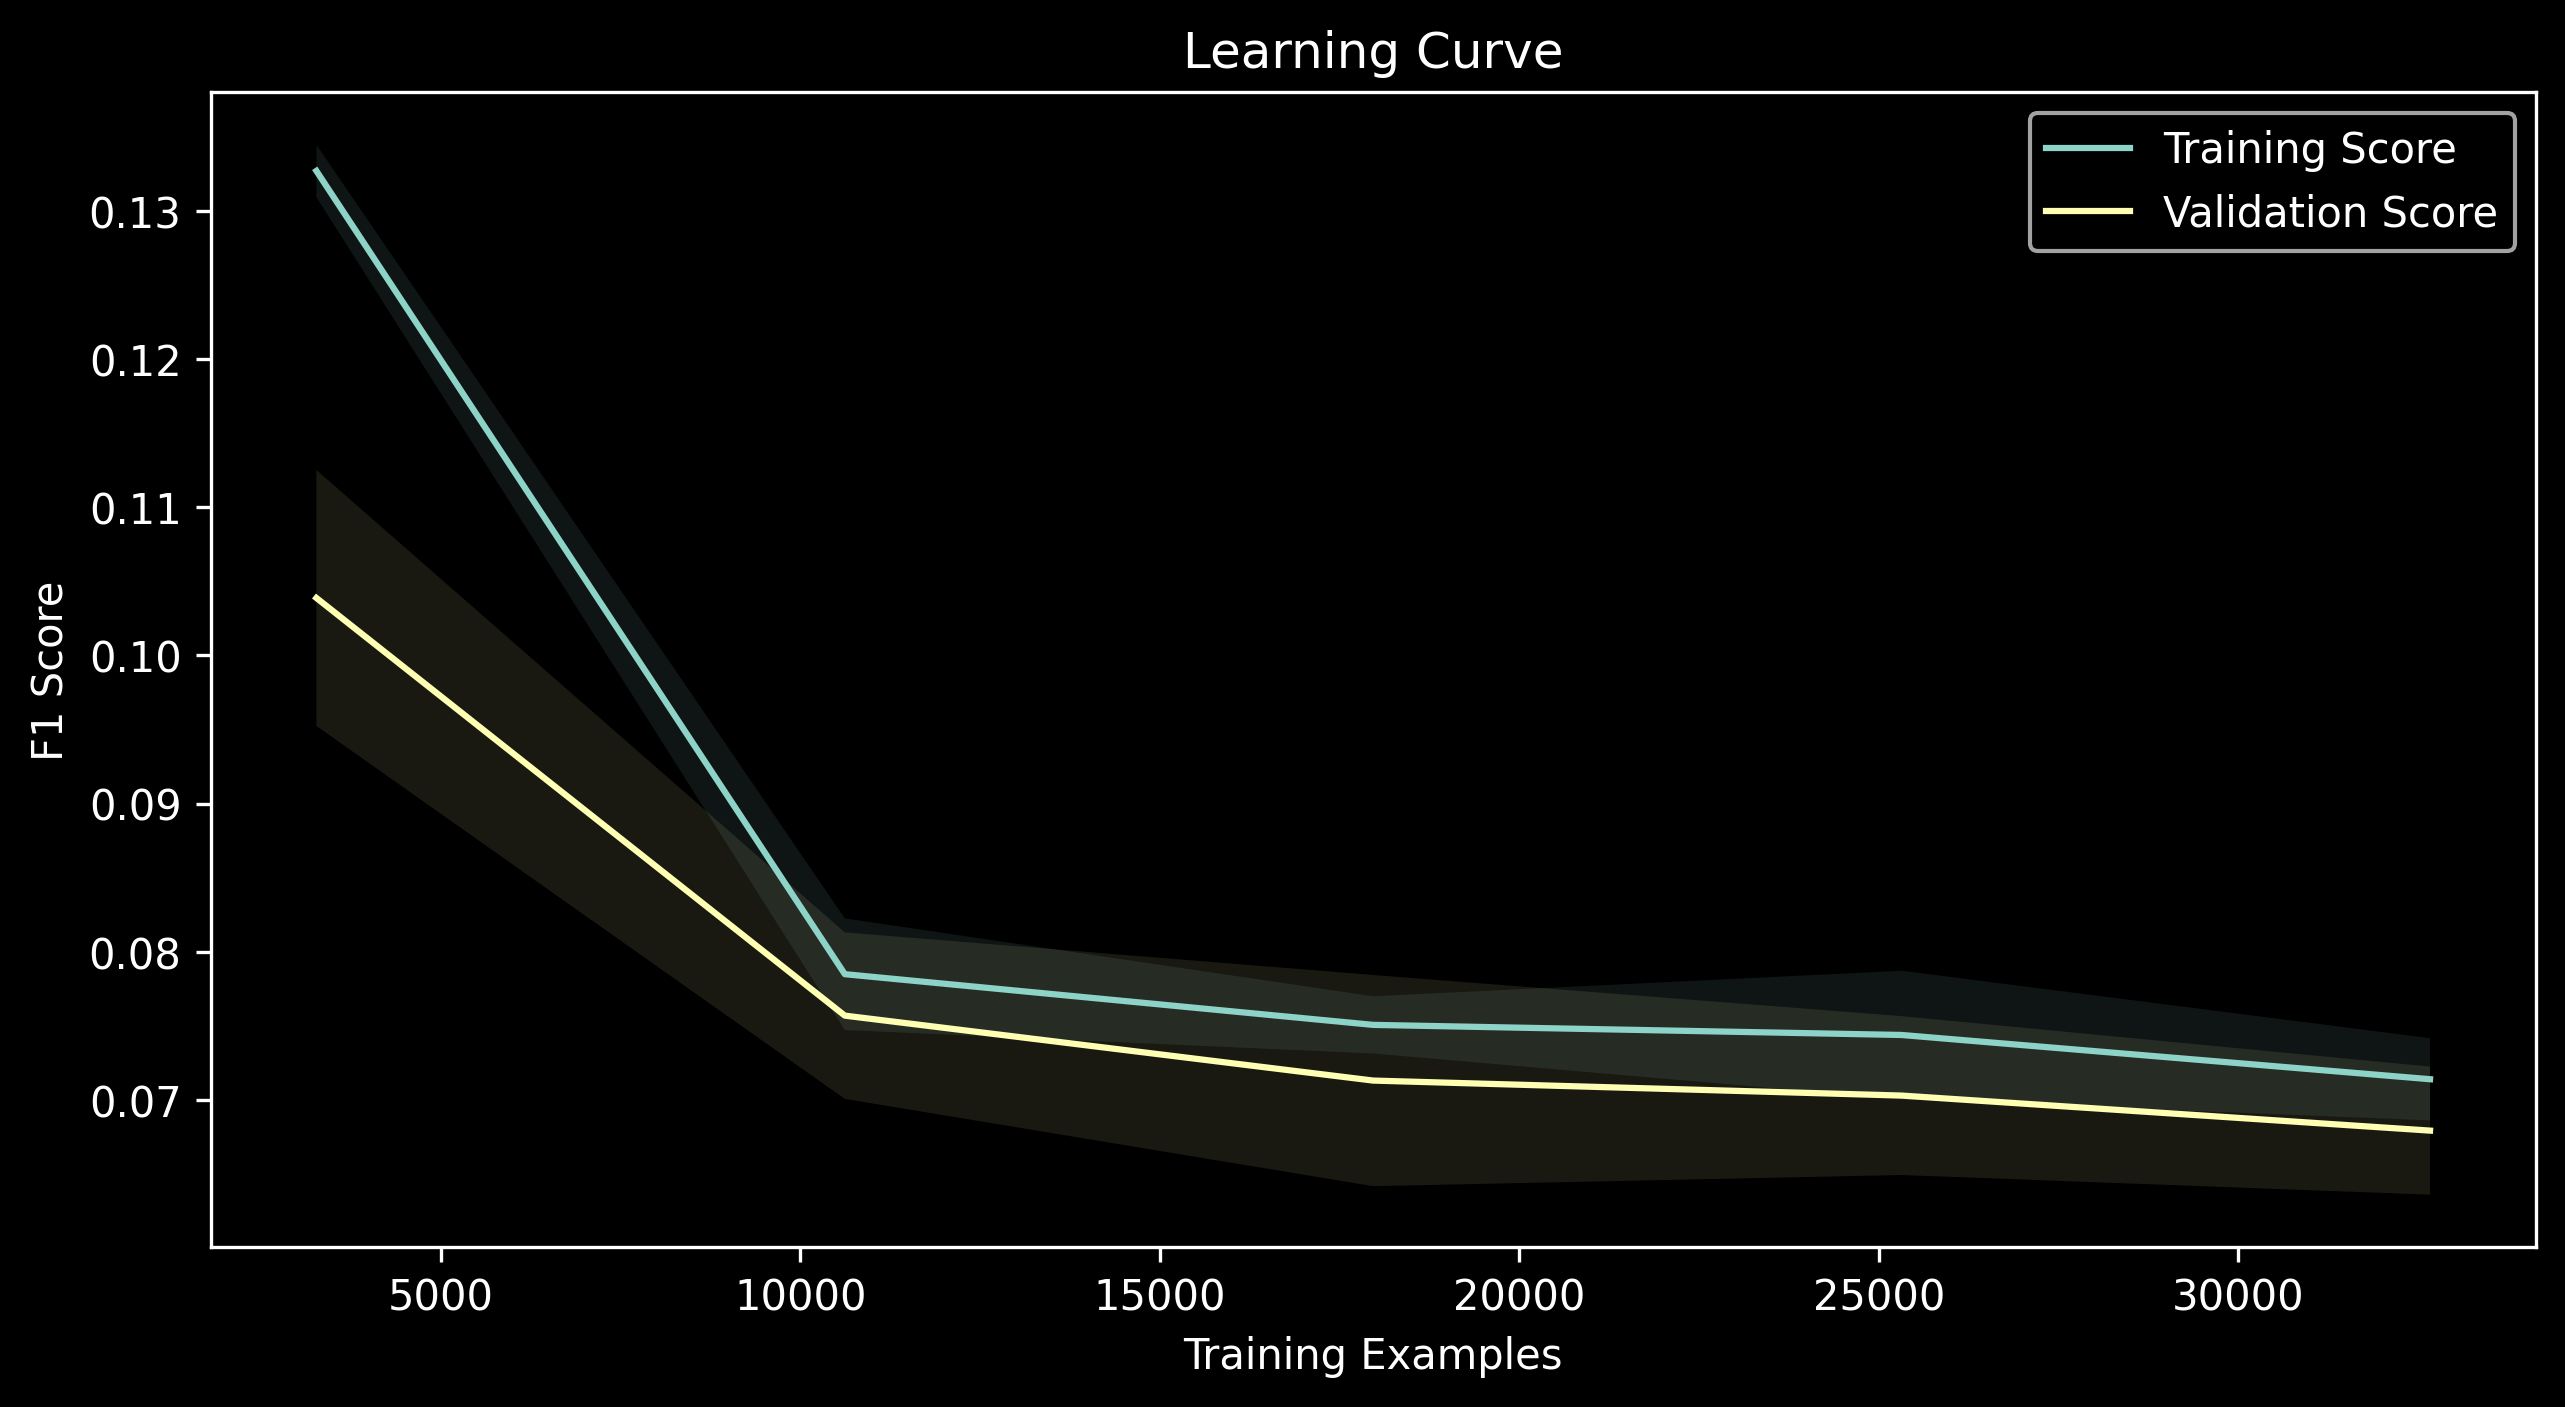

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> A perfect underfit model, we can see that the model is not able to learn from the data<br><br></font>

In [14]:
train_sizes = np.linspace(0.1, 1.0, 5)
learning_curves(model, x_data, y_data,N=train_sizes)
convey_insights(["A perfect underfit model, we can see that the model is not able to learn from the data"])

### Feature Selection

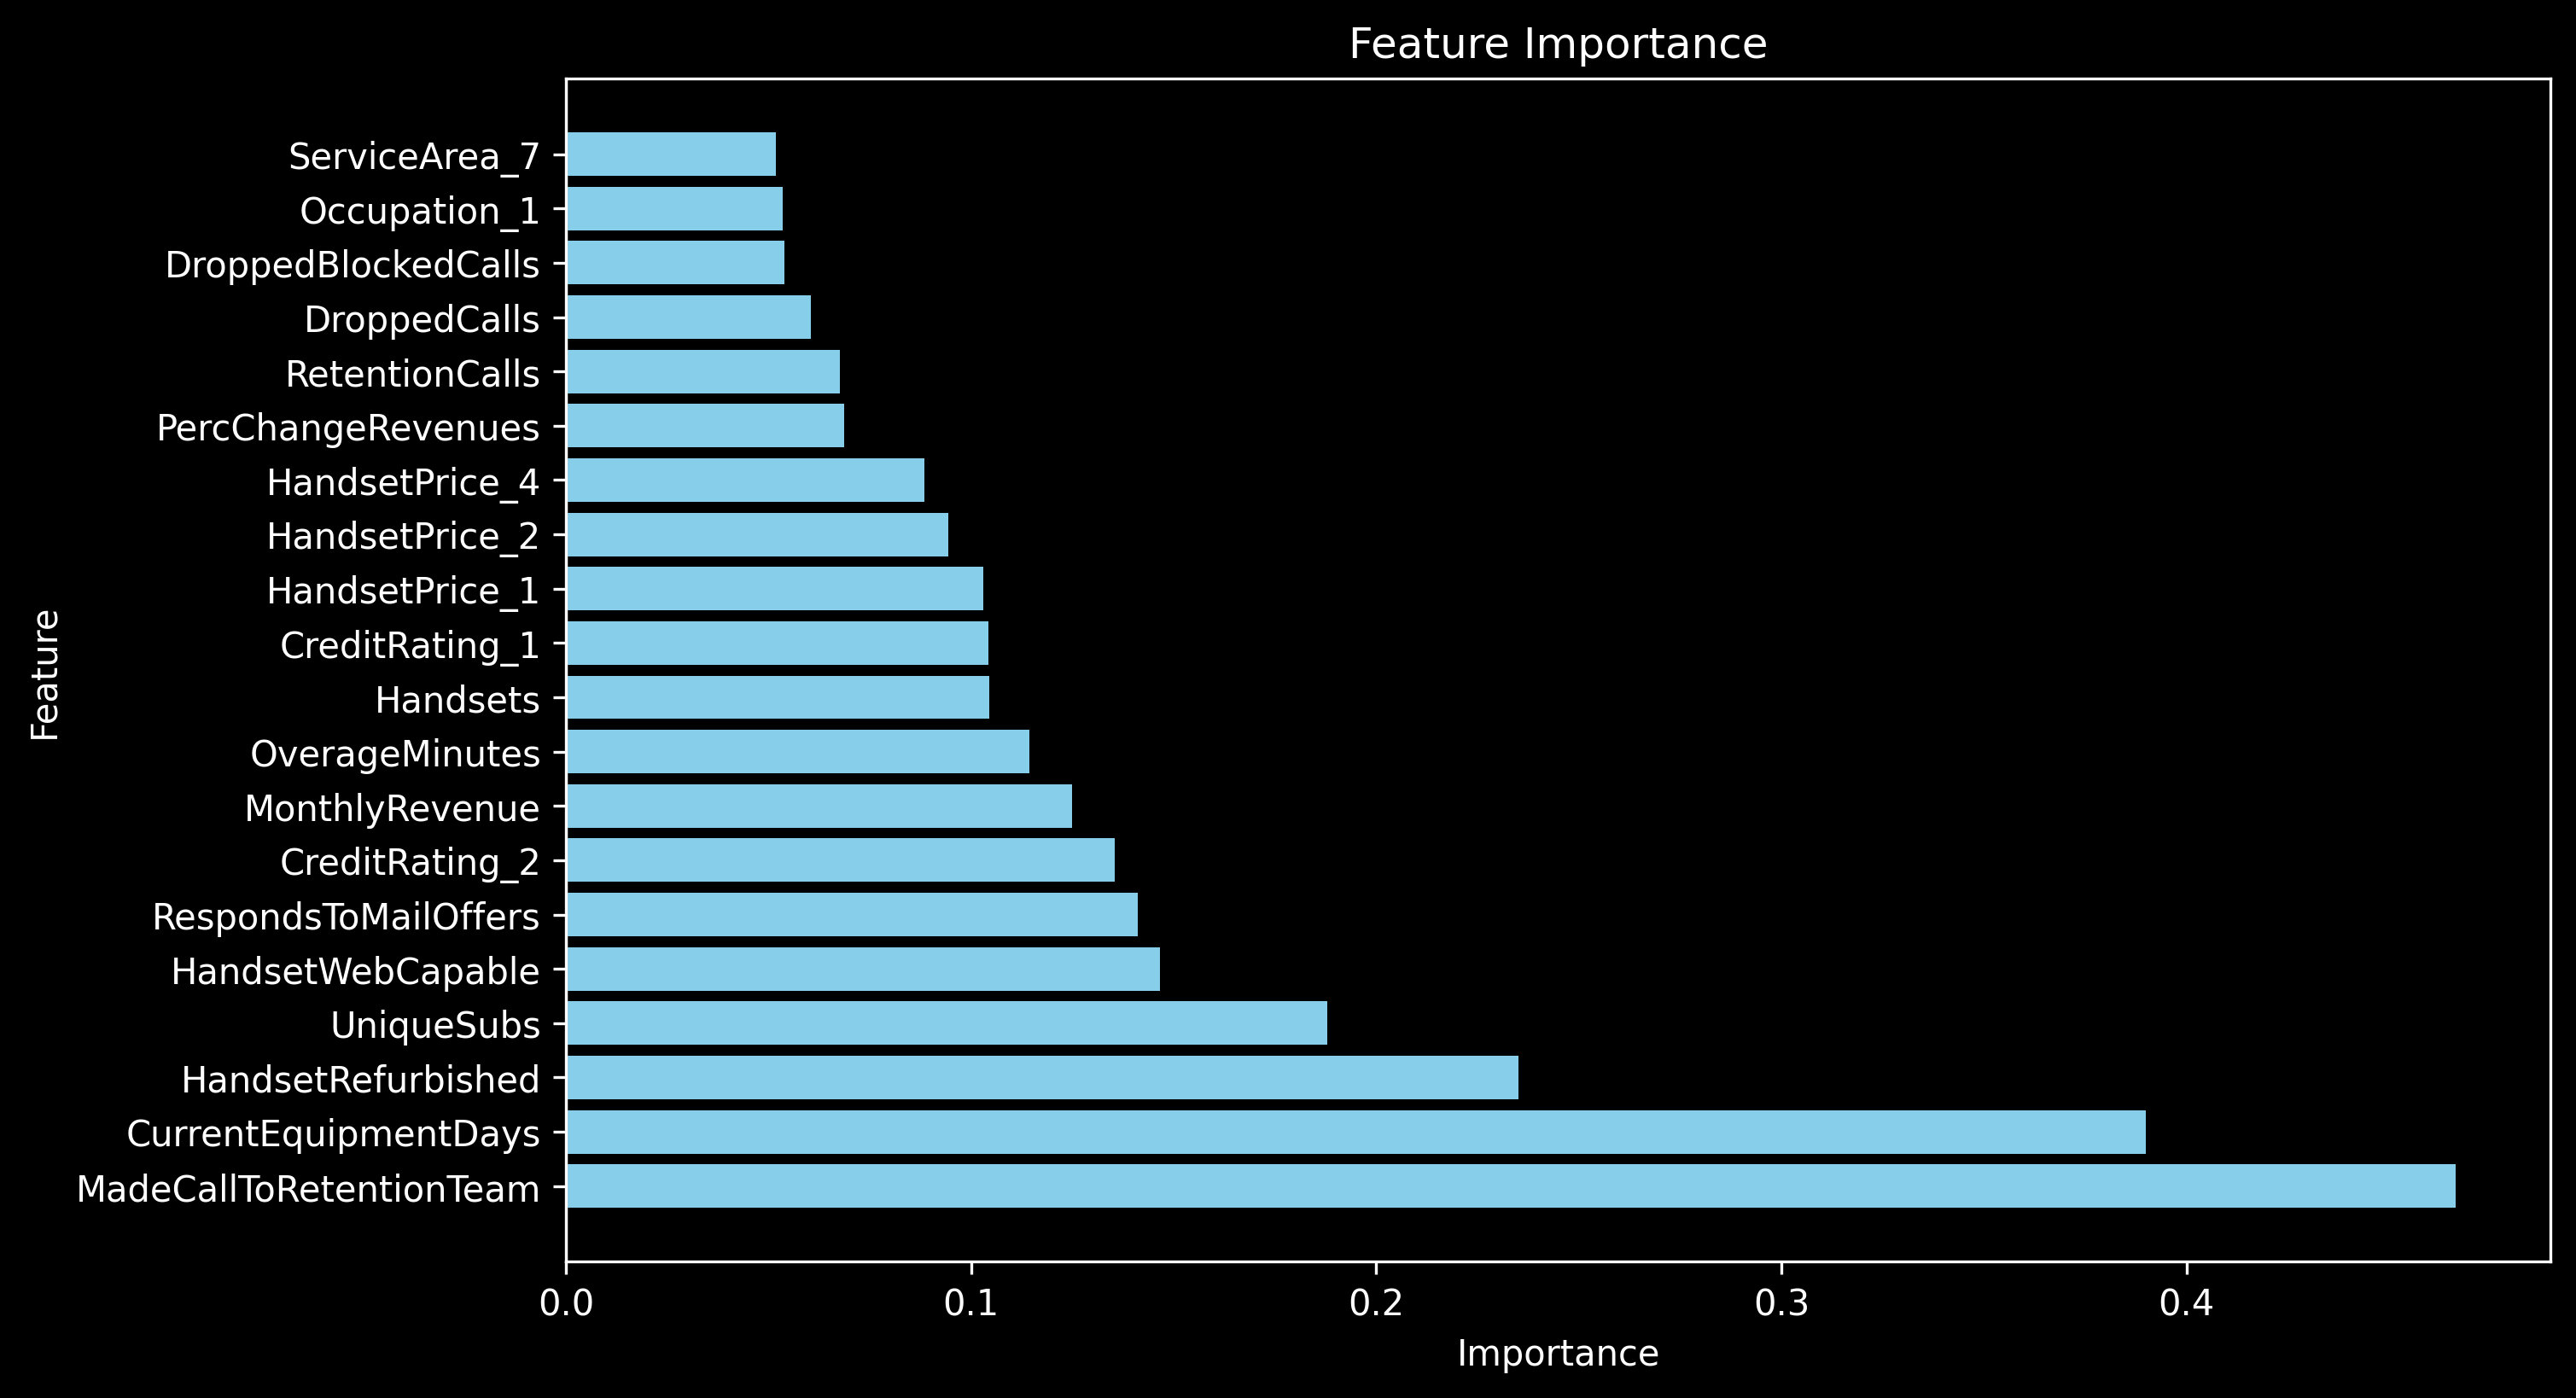

In [11]:
log_weights_analysis(model,x_data)


### Save Model

In [12]:
save_model(model_adjusted_name, model)

### Tracking

In [13]:
mlq.log_metrics(**scores)
mlq.end_quest()
mlq.show_logs(model_name, table_dest="../../", last_k=3)